In [1]:
import pandas as pd
#from talib.abstract import *
import matplotlib.pyplot as plt
import numpy as np

data_dir='/home/jorge/Documentos/proyecto_binance/binance-public-data/python/data/spot/monthly/klines/BTCUSDT/1m/BTCUSDT-1m-'

In [2]:
df = pd.DataFrame()

In [3]:
for j in range(1,13):
    if j < 10:
        df_concat = pd.read_csv(data_dir+'2019-0'+str(j)+'.csv',header=None,index_col=False)
        df = pd.concat([df, df_concat])
    else:
        df_concat = pd.read_csv(data_dir+'2019-'+str(j)+'.csv',header=None,index_col=False)
        df = pd.concat([df, df_concat])   

In [4]:
for i in range(3):
    for j in range(1,13):
        if j < 10:
            df_concat = pd.read_csv(data_dir+'202'+str(i)+'-0'+str(j)+'.csv',header=None,index_col=False)
            df = pd.concat([df, df_concat])
        else:
            df_concat = pd.read_csv(data_dir+'202'+str(i)+'-'+str(j)+'.csv',header=None,index_col=False)
            df = pd.concat([df, df_concat])           

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1546300800000,3701.23,3703.72,3701.09,3702.46,17.100110,1546300859999,63299.707312,180,5.746515,21275.695014,0
1,1546300860000,3702.44,3702.63,3695.66,3697.04,23.700604,1546300919999,87681.084348,148,15.120491,55935.394905,0
2,1546300920000,3699.42,3702.04,3696.08,3698.14,14.488615,1546300979999,53602.238977,80,12.700389,46990.970451,0
3,1546300980000,3697.49,3698.19,3695.97,3696.51,8.499966,1546301039999,31423.283322,75,4.199726,15527.374566,0
4,1546301040000,3697.20,3697.62,3695.00,3696.32,21.782886,1546301099999,80514.327585,93,15.080810,55740.503727,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099831 entries, 0 to 44639
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       int64  
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       int64  
 7   7       float64
 8   8       int64  
 9   9       float64
 10  10      float64
 11  11      int64  
dtypes: float64(8), int64(4)
memory usage: 208.3 MB


In [7]:
df.columns = ['open_time','open','high','low','close','volume','nose_1','nose_2','nose_3','nose_4','nose_5'
              ,'nose_6']

In [8]:
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')

In [9]:
df = df.set_index('open_time')

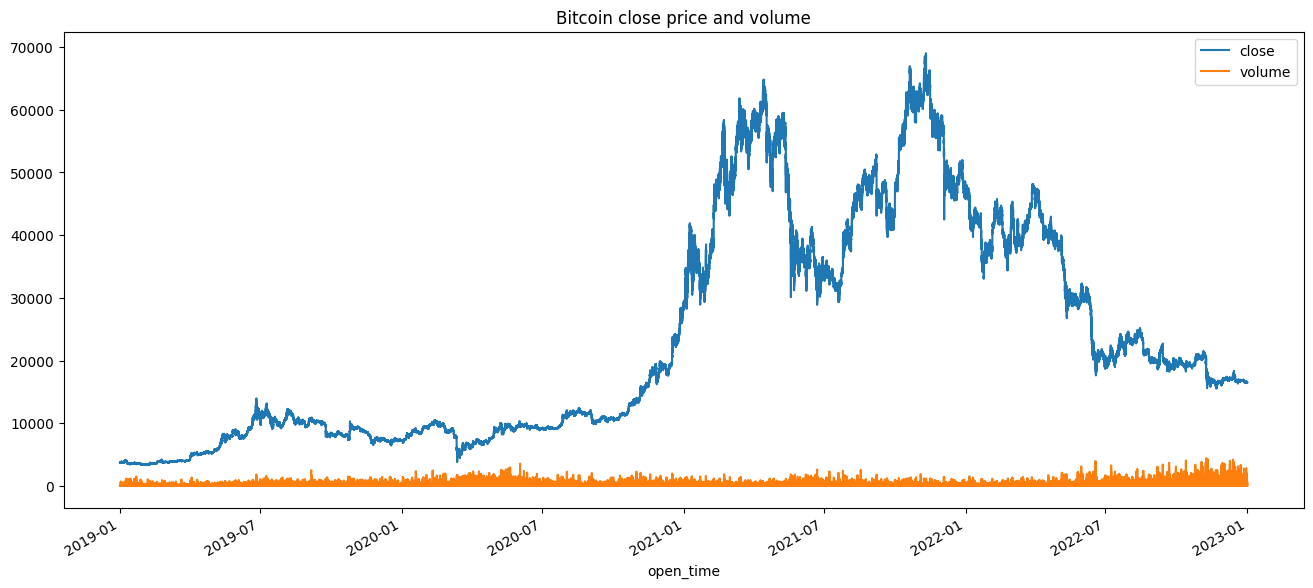

In [10]:
df.iloc[:,3].plot(figsize=(16,7),legend=True)
plt.title('Bitcoin close price and volume')
df.iloc[:,4].plot(figsize=(16,7),legend=True)
plt.show()

In [11]:
arr_vol = np.array(df.iloc[:,4])
arr_vol[:10]

array([17.10011 , 23.700604, 14.488615,  8.499966, 21.782886, 12.802446,
       16.228177, 16.41223 ,  9.7991  ,  7.054628])

In [12]:
arr_sma = [(arr_vol[i-(1440*1)]+arr_vol[i-(1440*2)]+arr_vol[i-(1440*3)]+arr_vol[i-(1440*4)]+arr_vol[i-(1440*5)]+
           arr_vol[i-(1440*6)]+arr_vol[i-(1440*7)]+arr_vol[i-(1440*8)]+arr_vol[i-(1440*9)]+
           arr_vol[i-(1440*10)])/10 for i in range(14400,arr_vol.shape[0])]

In [13]:
np.array(arr_sma).shape,arr_vol[14400:].shape

((2085431,), (2085431,))

In [14]:
arr_rvol = arr_vol[14400:] / np.array(arr_sma)

In [15]:
df_reduce = df.iloc[14400:,:5]
df_reduce.head()

,open,high,low,close,volume
open_time,,,,,
2019-01-11 00:00:00,3585.88,3589.07,3585.26,3586.70,24.128620
2019-01-11 00:01:00,3586.30,3586.70,3557.52,3567.60,228.676549
2019-01-11 00:02:00,3567.60,3579.69,3560.88,3576.09,136.268270
2019-01-11 00:03:00,3576.61,3579.79,3567.63,3577.53,48.127704
2019-01-11 00:04:00,3577.52,3579.99,3571.44,3577.73,25.051123


In [16]:
df_reduce['rvol'] = arr_rvol

In [17]:
df_reduce.head(-5)

,open,high,low,close,volume,rvol
open_time,,,,,,
2019-01-11 00:00:00,3585.88,3589.07,3585.26,3586.70,24.128620,0.577246
2019-01-11 00:01:00,3586.30,3586.70,3557.52,3567.60,228.676549,6.428402
2019-01-11 00:02:00,3567.60,3579.69,3560.88,3576.09,136.268270,4.629194
2019-01-11 00:03:00,3576.61,3579.79,3567.63,3577.53,48.127704,1.933427
2019-01-11 00:04:00,3577.52,3579.99,3571.44,3577.73,25.051123,1.054881
...,...,...,...,...,...,...
2022-12-31 23:50:00,16538.39,16539.39,16537.15,16537.34,23.851690,0.332006
2022-12-31 23:51:00,16537.34,16538.73,16535.72,16536.31,37.044610,0.592679
2022-12-31 23:52:00,16535.72,16538.62,16534.92,16538.30,38.136020,0.522441


In [18]:
rvol = []
for j in range(5):
    print('=====Serie=====')
    num = 0
    for i in range(j,(14400+j),1440):
        print(arr_vol[i])
        num += arr_vol[i]
    sma = num/10
    print('=====valor=====')
    print(arr_vol[(14400+j)])
    print(arr_vol[(14400+j)]/sma)

=====Serie=====
17.10011
268.412333
21.240828
12.49485
15.983525
13.428829
33.480239
10.704522
11.770536
13.379581
=====valor=====
24.12862
0.5772461302937023
=====Serie=====
23.700604
89.199862
21.161274
67.472735
10.574447
14.582949
63.034558
38.507025
17.387733
10.107242
=====valor=====
228.676549
6.428402409187263
=====Serie=====
14.488615
64.802347
45.41836
49.175628
5.850777
16.506796
12.357243
6.424685
71.917506
7.425198
=====valor=====
136.26827
4.629194109648544
=====Serie=====
8.499966
75.575252
33.835583
23.727721
12.655152
23.091297
32.501952
16.536036
14.851253
7.650084
=====valor=====
48.127704
1.9334273421024362
=====Serie=====
21.782886
40.42312
61.483774
7.858775
5.980536
46.147719
18.033806
9.241307
19.409059
7.117287
=====valor=====
25.051123
1.0548806467845697


In [19]:
df_reduce['high_per'] = ((df_reduce['high'] - df_reduce['open'])/df_reduce['high'])*100
df_reduce['low_per'] = ((df_reduce['open'] - df_reduce['low'])/df_reduce['open'])*100
df_reduce['close_per'] = ((df_reduce['close'] - df_reduce['open'])/df_reduce['close'])*100
df_reduce['close_money'] = ((df_reduce['close'] - df_reduce['open'])/df_reduce['close'])*1000

In [20]:
df_reduce.head()

,open,high,low,close,volume,rvol,high_per,low_per,close_per,close_money
open_time,,,,,,,,,,
2019-01-11 00:00:00,3585.88,3589.07,3585.26,3586.70,24.128620,0.577246,0.088881,0.017290,0.022862,0.228622
2019-01-11 00:01:00,3586.30,3586.70,3557.52,3567.60,228.676549,6.428402,0.011152,0.802498,-0.524162,-5.241619
2019-01-11 00:02:00,3567.60,3579.69,3560.88,3576.09,136.268270,4.629194,0.337739,0.188362,0.237410,2.374101
2019-01-11 00:03:00,3576.61,3579.79,3567.63,3577.53,48.127704,1.933427,0.088832,0.251076,0.025716,0.257161
2019-01-11 00:04:00,3577.52,3579.99,3571.44,3577.73,25.051123,1.054881,0.068995,0.169950,0.005870,0.058696


In [21]:
df_reduce = df_reduce.round(2)
df_reduce

,open,high,low,close,volume,rvol,high_per,low_per,close_per,close_money
open_time,,,,,,,,,,
2019-01-11 00:00:00,3585.88,3589.07,3585.26,3586.70,24.13,0.58,0.09,0.02,0.02,0.23
2019-01-11 00:01:00,3586.30,3586.70,3557.52,3567.60,228.68,6.43,0.01,0.80,-0.52,-5.24
2019-01-11 00:02:00,3567.60,3579.69,3560.88,3576.09,136.27,4.63,0.34,0.19,0.24,2.37
2019-01-11 00:03:00,3576.61,3579.79,3567.63,3577.53,48.13,1.93,0.09,0.25,0.03,0.26
2019-01-11 00:04:00,3577.52,3579.99,3571.44,3577.73,25.05,1.05,0.07,0.17,0.01,0.06
...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:55:00,16540.42,16540.92,16537.71,16539.28,36.24,0.31,0.00,0.02,-0.01,-0.07
2022-12-31 23:56:00,16538.65,16540.53,16538.38,16540.52,38.59,0.39,0.01,0.00,0.01,0.11
2022-12-31 23:57:00,16540.52,16540.79,16535.05,16537.78,53.36,0.94,0.00,0.03,-0.02,-0.17


In [22]:
df_reduce.replace(to_replace = 0.00, value = 0, inplace=True)

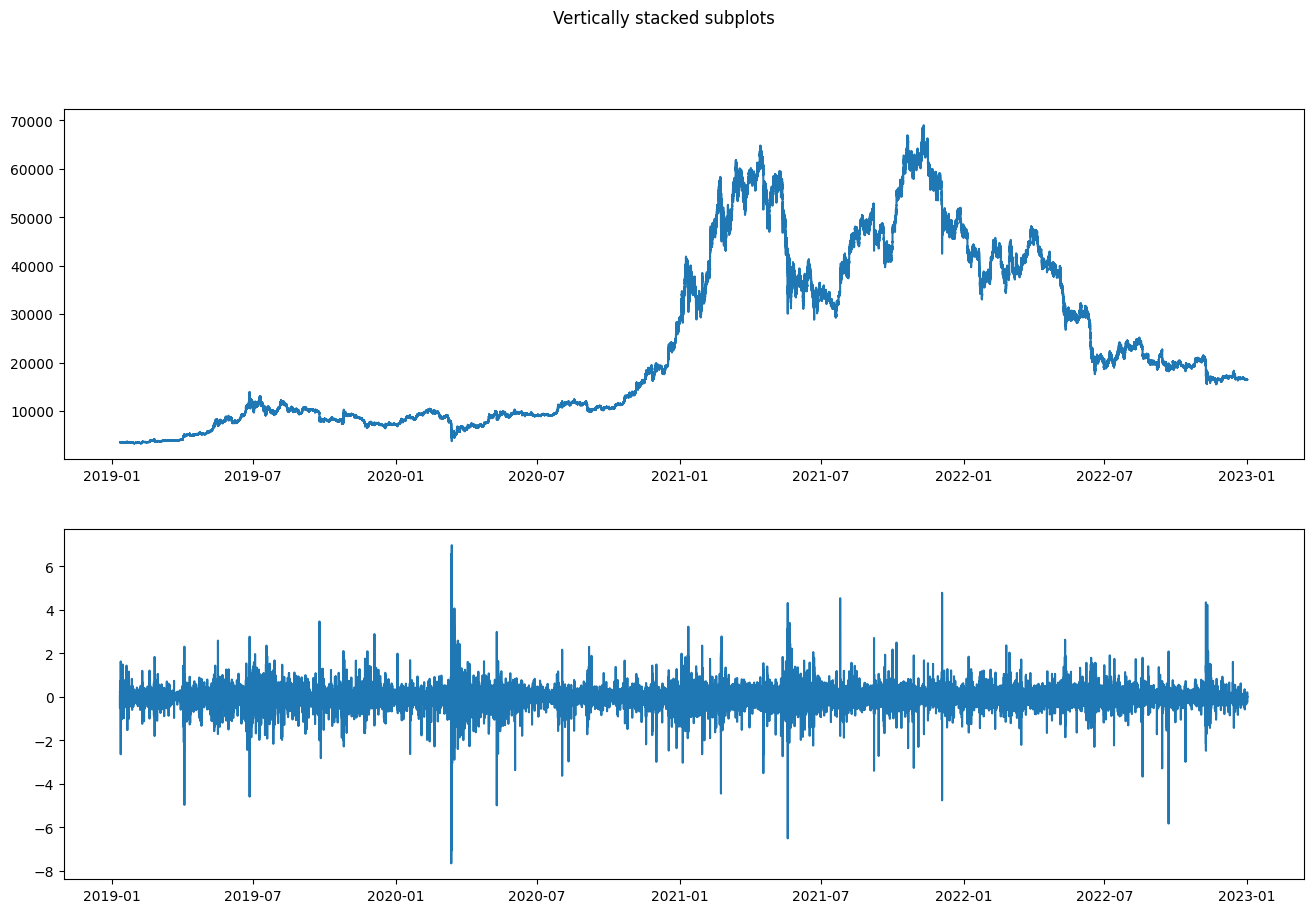

In [23]:
fig, axs = plt.subplots(2,figsize=(16,10))
fig.suptitle('Vertically stacked subplots')
axs[0].plot(df_reduce['close'])
axs[1].plot(df_reduce['close_per'])

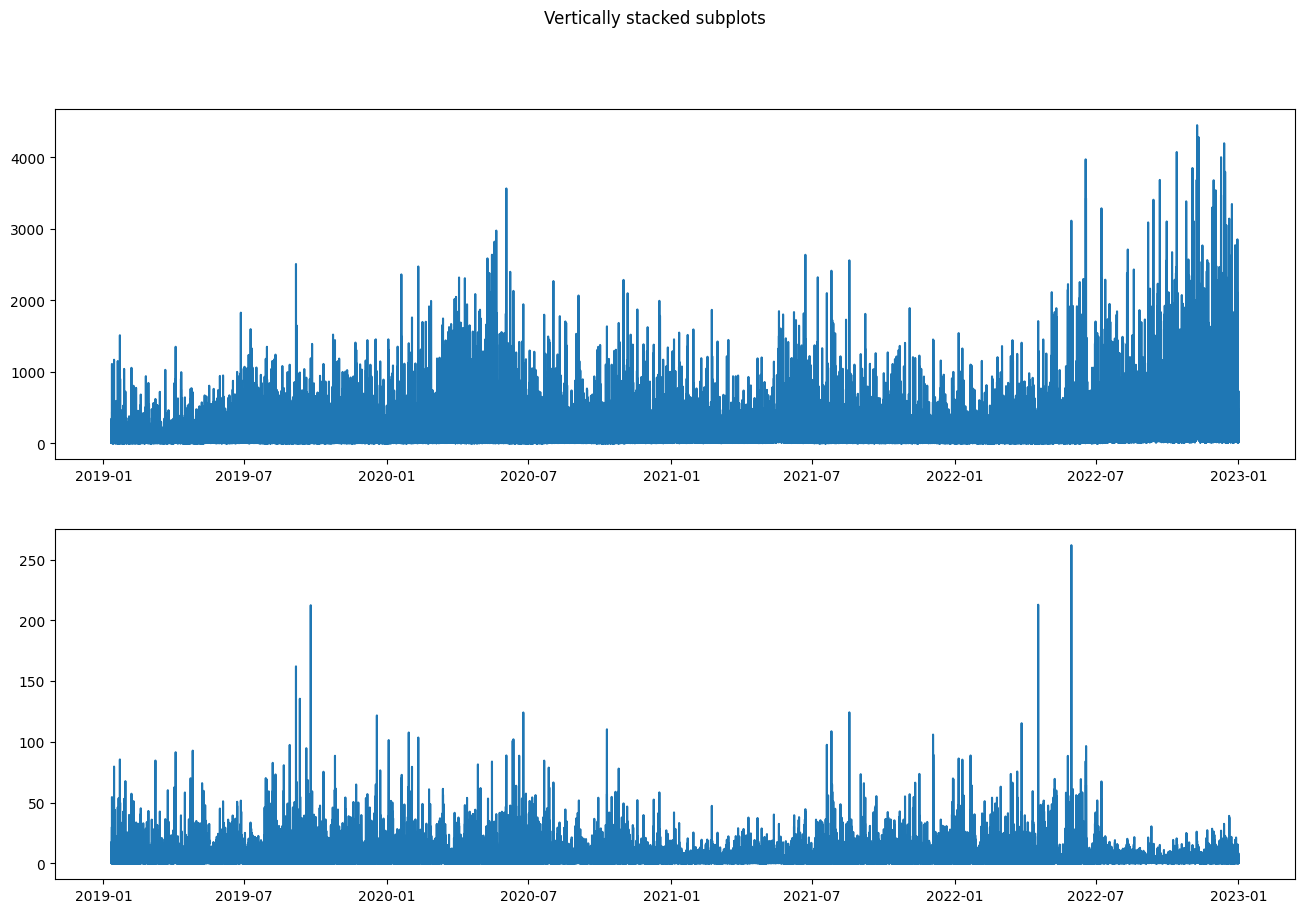

In [24]:
fig, axs = plt.subplots(2,figsize=(16,10))
fig.suptitle('Vertically stacked subplots')
axs[0].plot(df_reduce['volume'])
axs[1].plot(df_reduce['rvol'])

In [25]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [26]:
df_reduce['close']['2021':'2021']

open_time
2021-01-01 00:00:00    28961.66
2021-01-01 00:01:00    29009.91
2021-01-01 00:02:00    28989.30
2021-01-01 00:03:00    28982.69
2021-01-01 00:04:00    28975.65
                         ...   
2021-12-31 23:55:00    46252.69
2021-12-31 23:56:00    46249.99
2021-12-31 23:57:00    46248.35
2021-12-31 23:58:00    46186.33
2021-12-31 23:59:00    46216.93
Name: close, Length: 524607, dtype: float64

In [27]:
print('Kwiatkowski Phillips Schmidt Shin (KPSS) test:')
print('')
result_kpss_ct=kpss(df_reduce['close'],regression="ct")
print('Test Statistic: %f' %result_kpss_ct[0])
print('p-value: %f' %result_kpss_ct[1])
print('Critical values:')
for key, value in result_kpss_ct[3].items():
     print('\t%s: %.3f' %(key, value))

Kwiatkowski Phillips Schmidt Shin (KPSS) test:

Test Statistic: 32.708689
p-value: 0.010000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/home/jorge/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [28]:
print('Kwiatkowski Phillips Schmidt Shin (KPSS) test:')
print('')
result_kpss_ct=kpss(df_reduce['close_per'],regression="ct")
print('Test Statistic: %f' %result_kpss_ct[0])
print('p-value: %f' %result_kpss_ct[1])
print('Critical values:')
for key, value in result_kpss_ct[3].items():
     print('\t%s: %.3f' %(key, value))

Kwiatkowski Phillips Schmidt Shin (KPSS) test:

Test Statistic: 0.083633
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/home/jorge/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [ ]:
df_reduce.to_csv('/home/jorge/Documentos/TFG/datasets/BTCUSDT_spot_1m_.csv',index=True)

In [ ]:
df = pd.read_csv('/home/jorge/Documentos/TFG/datasets/BTCUSDT_spot_1m_.csv')

df

In [ ]:
df.replace(to_replace = 0.00, value = 0, inplace=True)
df

In [ ]:
df.iloc[:,[9]].plot(figsize=(16,7),legend=True)
plt.title('Bitcoin stock price ')
plt.show()

In [ ]:
arr_close = np.array(df['close_per'])[1:].reshape(-1,1).astype(np.float32)
arr_rvol = np.array(df['rvol'])[:-1].reshape(-1,1).astype(np.float32)
arr_high = np.array(df['high_per'])[:-1].reshape(-1,1).astype(np.float32)
arr_low = np.array(df['low_per'])[:-1].reshape(-1,1)

arr_x = np.concatenate([arr_close,arr_rvol,arr_high,arr_low],axis=1)

df_corr = pd.DataFrame(arr_x, columns=['close_per','rvol','high_per','low_per'])

df_corr.corr()